# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:

lat_lngs = []

cities = []

lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:

weather_api_key = '5b7732bc23960e326107c1f0c440a80d'
url = "https://api.openweathermap.org/data/2.5/weather?appid=%s&units=imperial&q=" % weather_api_key

city_data = []


print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):
        
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = url + city 
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    record_count = record_count + 1 

    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except Exception as e: #Code snippet taken from: https://www.delftstack.com/howto/python/python-except-exception-as-e/
        print("City not found {}. Skipping...{}".format(city, e))
        pass
              
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cat ba
City not found cat ba. Skipping...'coord'
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | port macquarie
Processing Record 4 of Set 1 | khandyga
Processing Record 5 of Set 1 | sovetskaya gavan'
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | taoudenni
Processing Record 8 of Set 1 | klyuchi
Processing Record 9 of Set 1 | al jubayl
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | khorixas
Processing Record 12 of Set 1 | chonchi
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | kingston
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | bomdila
Processing Record 21 of Set 1 | bl

In [4]:

city_data_df = pd.DataFrame(city_data)

city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,55.78,64,100,10.92,SH,1709253440
1,port macquarie,-31.4333,152.9167,86.90,66,39,10.36,AU,1709253277
2,khandyga,62.6667,135.6000,-26.72,99,97,1.36,RU,1709253442
3,sovetskaya gavan',48.9723,140.2878,12.11,86,91,1.99,RU,1709253442
4,bethel,41.3712,-73.4140,34.11,45,0,4.61,US,1709253443


In [6]:

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:

city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,55.78,64,100,10.92,SH,1709253440
1,port macquarie,-31.4333,152.9167,86.90,66,39,10.36,AU,1709253277
2,khandyga,62.6667,135.6000,-26.72,99,97,1.36,RU,1709253442
3,sovetskaya gavan',48.9723,140.2878,12.11,86,91,1.99,RU,1709253442
4,bethel,41.3712,-73.4140,34.11,45,0,4.61,US,1709253443


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

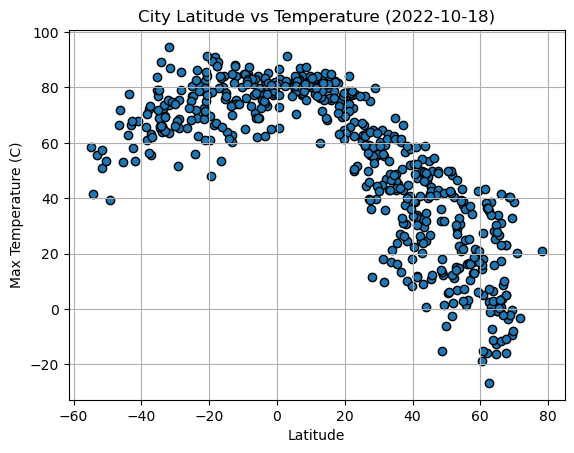

In [8]:
import matplotlib.pyplot as plt

x = city_data_df['Lat']
y = city_data_df['Max Temp']

plt.scatter(x, y, edgecolors='black')
plt.title('City Latitude vs Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
plt.savefig("output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

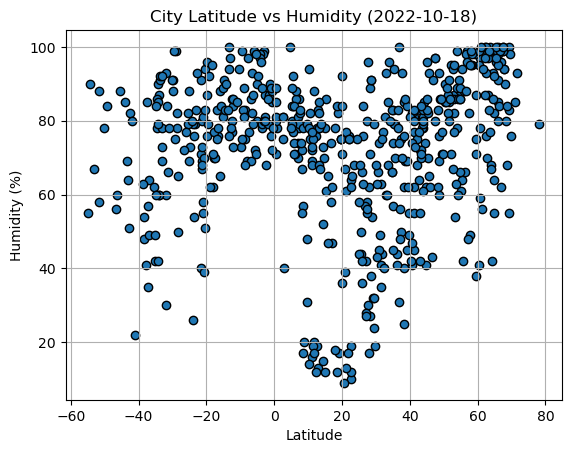

In [9]:
import matplotlib.pyplot as plt

x = city_data_df['Lat']
y = city_data_df['Humidity']

plt.scatter(x, y, edgecolors='black')
plt.title('City Latitude vs Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

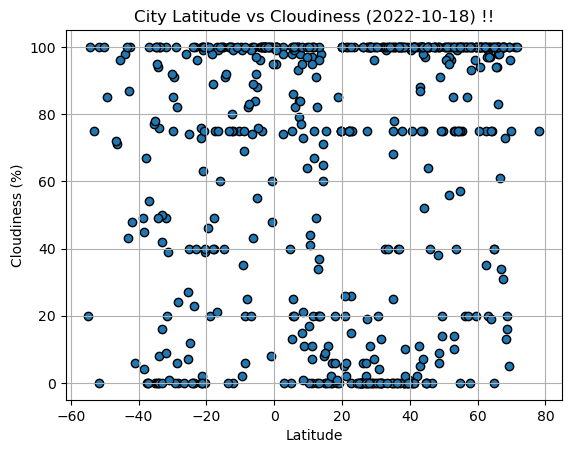

In [10]:
x = city_data_df['Lat']
y = city_data_df['Cloudiness']

plt.scatter(x, y, edgecolors='black')
plt.title('City Latitude vs Cloudiness (2022-10-18) !!')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

plt.savefig("output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

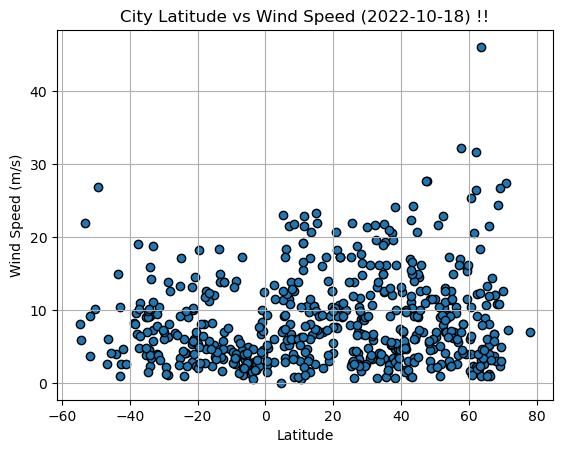

In [11]:
x = city_data_df['Lat']
y = city_data_df['Wind Speed']

plt.scatter(x, y, edgecolors='black')
plt.title('City Latitude vs Wind Speed (2022-10-18) !!')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

plt.savefig("output_data/Fig4.png")

plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [91]:

from sklearn.linear_model import LinearRegression

def display_regression(x, y, title, y_label, text_coordinates):
    First_x = np.array(x).reshape(-1, 1)
    First_y = np.array(y)

    model = LinearRegression().fit(First_x, First_y)
    slope = model.coef_[0]
    r_value = model.score(First_x, First_y)
    y_axis = model.intercept_


    y_pred = model.predict(First_x)
    plt.scatter(x, y)
    plt.plot(x, y_pred, color='red')

    equation = f'y = {slope:.2f}x + {y_axis:.2f} r = {r_value:.2f}'

    plt.annotate(equation, text_coordinates, fontsize = 12, color='red')

    plt.title(title)
    plt.xlabel('Lat')

    plt.ylabel(y_label)
    plt.show()

    return r_value


    



In [92]:

northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,khandyga,62.6667,135.6000,-26.72,99,97,1.36,RU,1709253442
3,sovetskaya gavan',48.9723,140.2878,12.11,86,91,1.99,RU,1709253442
4,bethel,41.3712,-73.4140,34.11,45,0,4.61,US,1709253443
5,taoudenni,22.6783,-3.9836,62.31,19,15,9.84,ML,1709253444
6,klyuchi,52.2667,79.1667,11.35,95,96,7.94,RU,1709253444


In [93]:

southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,55.78,64,100,10.92,SH,1709253440
1,port macquarie,-31.4333,152.9167,86.90,66,39,10.36,AU,1709253277
8,invercargill,-46.4000,168.3500,72.01,60,71,5.99,NZ,1709253446
9,khorixas,-20.3667,14.9667,78.80,51,39,5.41,NaN,1709253446
10,chonchi,-42.6128,-73.8092,58.12,82,100,2.64,CL,1709253447


###  Temperature vs. Latitude Linear Regression Plot

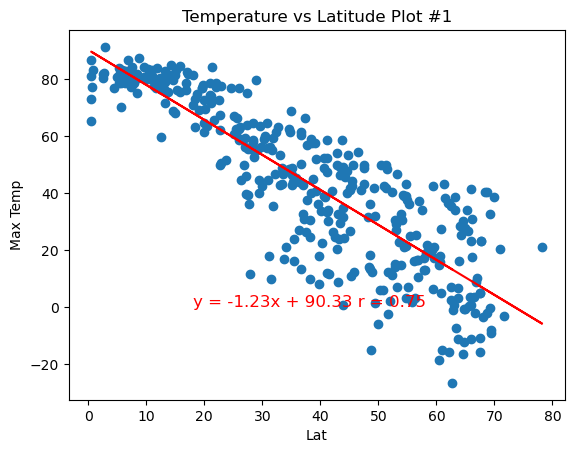

The FINAL R Value =  0.748658903693224


In [94]:

from sklearn.linear_model import LinearRegression

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

rv_1 = display_regression(x, y, 'Temperature vs Latitude Plot #1', 'Max Temp', (18,0))

print("The FINAL R Value = ", rv_1)



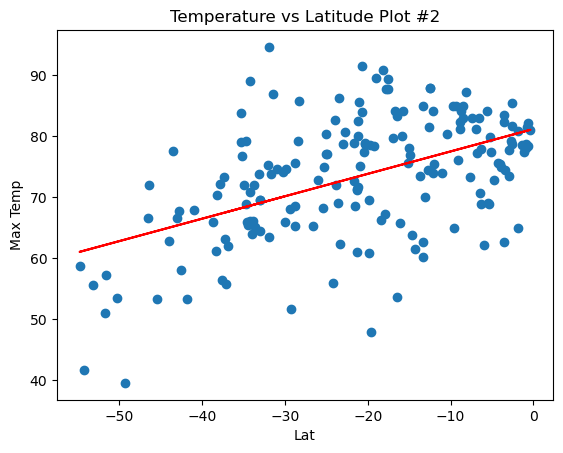

The FINAL R VALUE ==  0.25523304343762543
DISCUSSION: This relationship highlights 


In [96]:
from sklearn.linear_model import LinearRegression

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

rv_2 = display_regression(x, y, 'Temperature vs Latitude Plot #2', 'Max Temp', (18,0))

print("The FINAL R VALUE == ", rv_2)

print('DISCUSSION: This relationship highlights ')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

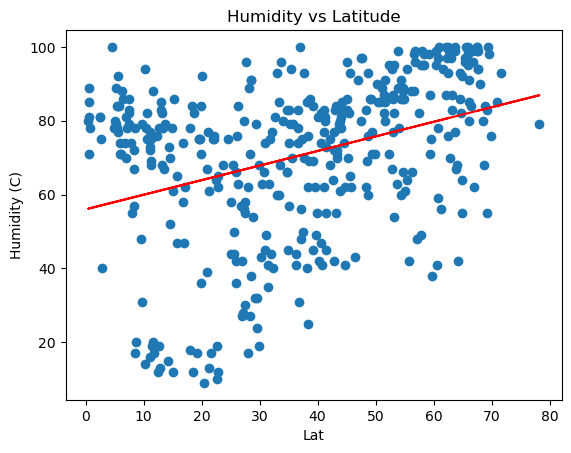

The FINAL R VALUE ==  0.12707354446185026
DISCUSSION: This relationship highlights 


In [98]:

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

rv_3 = display_regression(x, y, 'Humidity vs Latitude', 'Humidity (C)', (18,0))

print("The FINAL R VALUE == ", rv_3)

print('DISCUSSION: This relationship highlights ')

The r-value is: 0.0002808747046324607


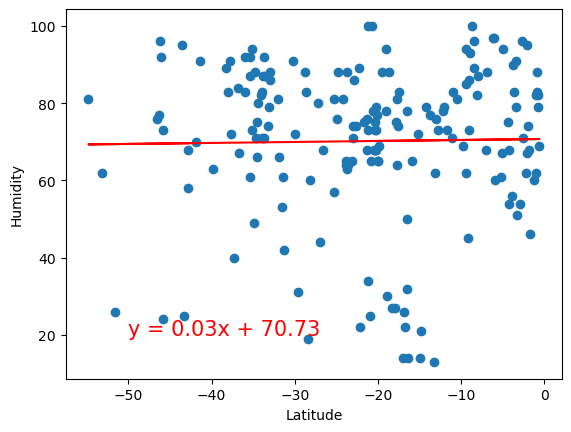

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


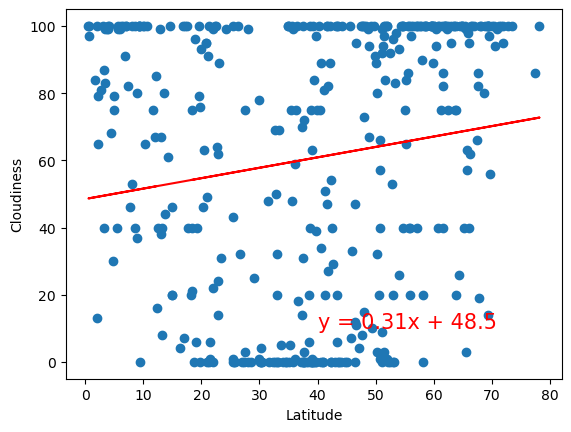

The r-value is: 0.02056735429994368


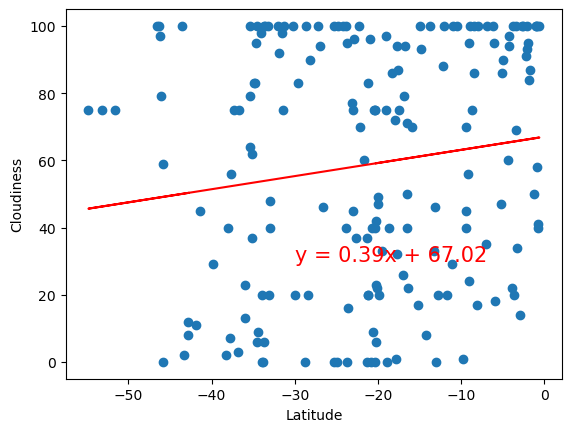

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


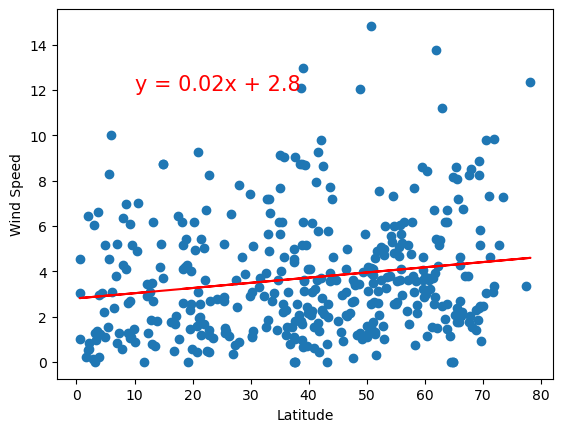

The r-value is: 0.062239040700515696


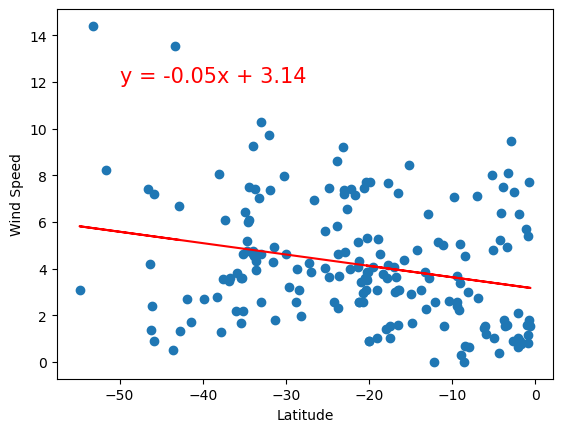

**Discussion about the linear relationship:** YOUR RESPONSE HERE